# Talk 19. Applications of ML in Text Analysis

Text analysis involves the application of natural language processing (NLP) techniques to extract meaningful insights and information from textual data. Machine learning has revolutionized this field, enabling us to automate tasks that were previously labor-intensive and time-consuming. Below are the some practical examples of how ML is transforming text analysis.

**1.Sentiment Analysis:**

One popular application of ML in text analysis is Sentiment Analysis. This involves determining the emotional sentiment expressed in a piece of text, whether it's positive, negative, or neutral. Companies often use sentiment analysis to monitor their brand's reputation, customer feedback, and public perception.

Machine learning models, such as Support Vector Machines (SVM), Naive Bayes, and Recurrent Neural Networks (RNNs), are trained on labeled datasets containing positive and negative sentiments. Once trained, these models can accurately classify new, unseen text into different sentiment categories. By analyzing customer reviews, social media posts, or survey responses, businesses can gain valuable insights into customer satisfaction, identify areas for improvement, and make data-driven decisions.

**2.Spam Messages Filtering**

1.Spam filtering is a classic and essential application of machine learning in text analysis. 

2.The goal is automatically detecting and classifying unsolicited and unwanted emails or messages as spam. 

3.Machine learning algorithms are trained on labeled datasets containing examples of both spam and non-spam (ham) messages.

4.These algorithms learn patterns and characteristics from the training data and use them to classify new, unseen messages as either spam or ham.


# Flow Diagram

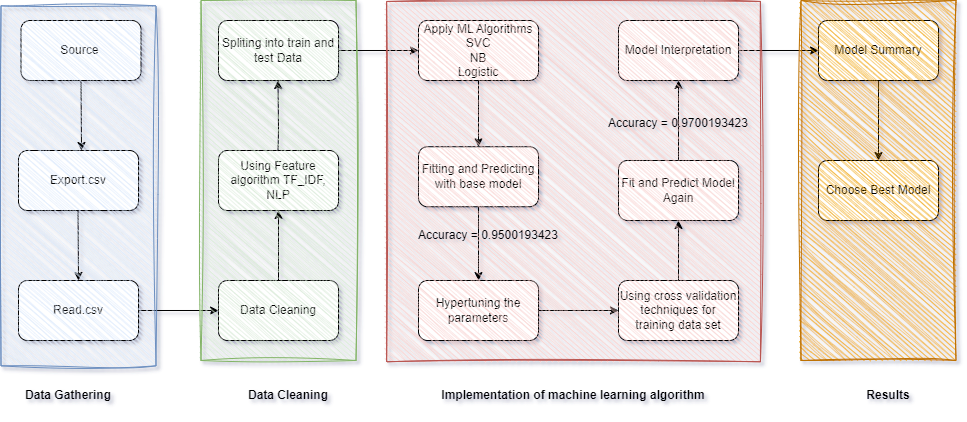

# Reading the data set 

In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [131]:
encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1']
for encoding in encodings_to_try:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        # If the read is successful, break the loop
        break
    except UnicodeDecodeError:
        continue

In [132]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4136,ham,Just got to &lt;#&gt;,NaN,NaN,NaN
923,ham,She went to attend another two rounds today..b...,NaN,NaN,NaN
1599,ham,"Yeah probably, I still gotta check out with leo",NaN,NaN,NaN
2924,ham,Are you coming to day for class.,NaN,NaN,NaN
2991,ham,K.i did't see you.:)k:)where are you now?,NaN,NaN,NaN


In [133]:
# check number of rows and column in data set
df.shape

(5572, 5)

In [134]:
# Steps in machine learning model -- 
# 1. Data Cleaning
# 2. EDA
# 3. Data/Text Preprocessing
# 4. Model Building (Naive Bays, SVM,RF,LGR,KNN)
# 5. Evaluation
# 6. Hypertuning (Improvement)
# 7. Simple Website 



# 1. Data Cleaning

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [136]:
# drop last three colums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [137]:
# renaiming the columns as target and text
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [138]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
encoder=LabelEncoder()

In [140]:
df['target'] = encoder.fit_transform(df['target'])

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
# check and remove missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [143]:
# check and remove duplicates
df.duplicated().sum()
df= df.drop_duplicates(keep='first')

In [144]:
df.duplicated().sum()

0

In [145]:
df.shape

(5169, 2)

# 2.Exploratory data Analysis

It is a crucial initial step in data analysis. EDA involves visualizing, summarizing, and understanding the main characteristics of a dataset to gain insights and make informed decisions about data preprocessing, feature engineering, and model selection.

In [146]:
# explore the data set first 
# 1. check how many are ham mails and how many are spam mails
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

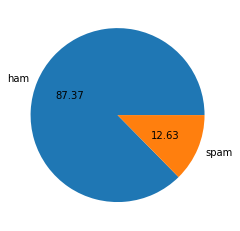

In [147]:
# visualize the data set
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [148]:
# Above Data is imbalance ( One of the challenge)


In [149]:
# NLTK provides a wide range of tools and resources for working with human language data, making it easier to process, 
# analyze, and understand text.
import nltk

In [150]:
#nltk.download('punkt')

In [151]:
#lenght of the text
df['num_characters']=df['text'].apply(len)

In [152]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [153]:
# number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [154]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [155]:
# number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [156]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [157]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [158]:
# analyse ham messages
df_ham = df[df['target']==0]
df_ham[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [159]:
# analyse spam messages
df_spam = df[df['target']==1]
df_spam[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [160]:
# Conclusion -- Spam messages are longer than ham messages

In [161]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

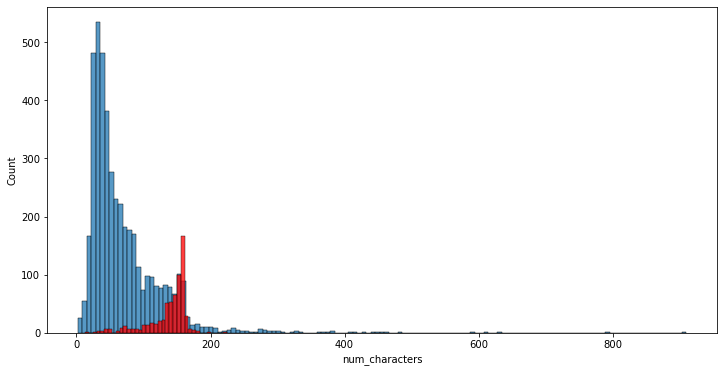

In [162]:
plt.figure(figsize=(12,6))
sns.histplot(df_ham['num_characters'])
sns.histplot(df_spam['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

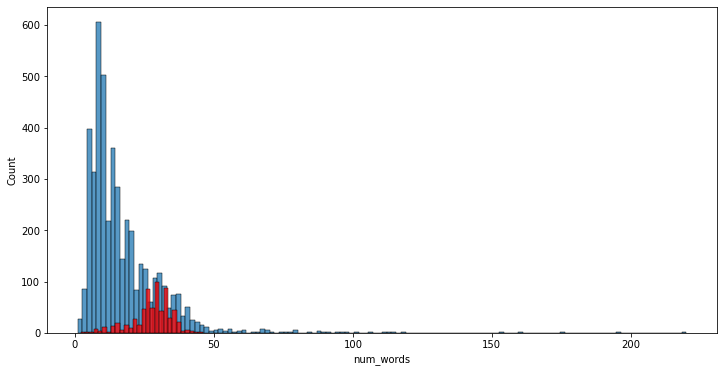

In [163]:
plt.figure(figsize=(12,6))
sns.histplot(df_ham['num_words'])
sns.histplot(df_spam['num_words'],color='red')

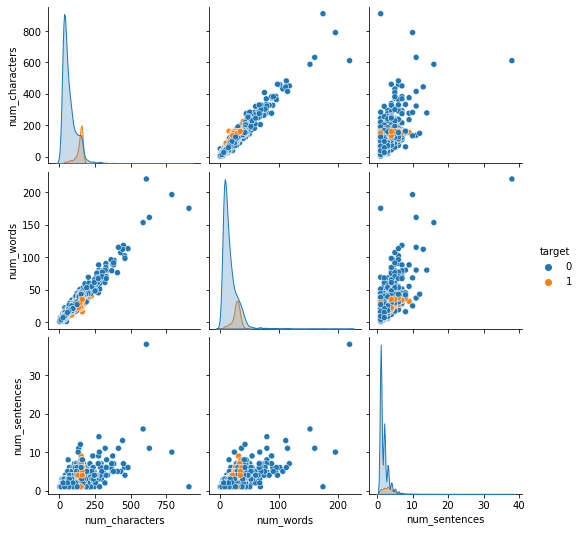

In [164]:
# correlation 
sns.pairplot(df,hue='target')

<AxesSubplot:>

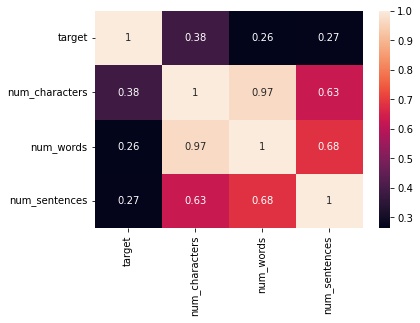

In [165]:
sns.heatmap(df.corr(),annot=True)

In [166]:
#Conclusion --  we will keep number of words because of low collinerarity


# 3. Data(Text) Preprocessing
1. Lower Case
2. Tokenization
3. Remove special characters
4. Removing stop words and punctuation
5. Stemming

In [167]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower() # 1.convert to lowercase
    text = nltk.word_tokenize(text) # 2.convert to individual text 
    y=[]
    #3. remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #4. remove stopwords and punctuation 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    # 5. stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [168]:
# demo example  
transform_text('Hey you won the lottary. Please click on the link to claim the money ?')

'hey lottari pleas click link claim money'

In [169]:
df['transformed_text']=df['text'].apply(transform_text)

In [170]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WordCloud

WordClouds are commonly used for exploratory data analysis to quickly grasp the most prominent themes or topics in a large collection of text documents. They provide a visual summary of the textual data, making it easier to identify significant keywords or trends

In [171]:
# wordcloud 
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')



In [172]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

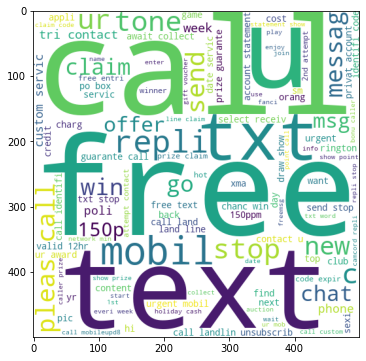

In [173]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [174]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

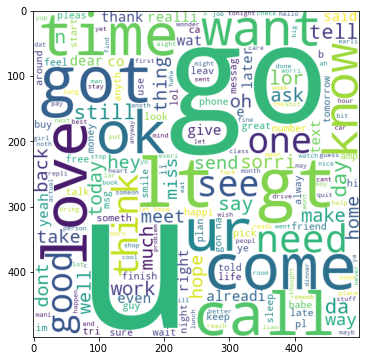

In [175]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [176]:
# find top 30 most repeated words in spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [177]:
# number of words in spam messages
len(spam_corpus)

9939

C:\Users\91953\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


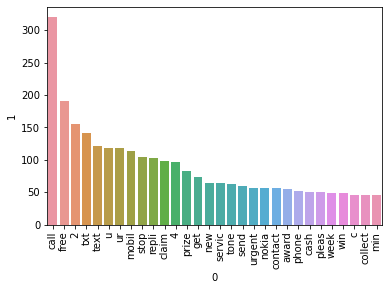

In [178]:
from collections import Counter
Counter(spam_corpus).most_common(30)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [179]:
# find top 30 most repeated words in ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [180]:
# number of words in ham messages
len(ham_corpus)

35402

C:\Users\91953\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


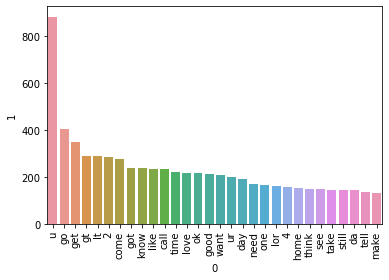

In [181]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#  4. Model Building

1. Naive Bayes

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' theorem, which is used for classification and is particularly well-suited for text classification tasks. The "naive" in Naive Bayes refers to the assumption of independence among features, making it computationally efficient and straightforward to implement.

CountVectorizer 

CountVectorizer is a text preprocessing technique in machine learning, typically used for converting text documents into numerical feature vectors. It creates a matrix where each row represents a document, and each column represents the count of a word or token in that document, enabling ML models to work with text data efficiently.

# 4.1 Using CountVectorizer and Naive Bayes techniques  

In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [183]:
cv=CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

In [184]:
X.shape

(5169, 6708)

In [185]:
y = df['target'].values

In [186]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [191]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [192]:
X_train.shape

(4135, 6708)

In [190]:
X_test.shape

(1034, 6708)

In [193]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [194]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [195]:
# model 1 Gaussian
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy_score_gnb:",accuracy_score(y_test,y_pred_gnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision Score : ",precision_score(y_test,y_pred_gnb))
# we need to focus on precision score because data is imbalance 

Accuracy_score_gnb: 0.8800773694390716
Confusion matrix:
[[792 104]
 [ 20 118]]
Precision Score :  0.5315315315315315


In [196]:
# model 2 Multinomail 
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy_score_mnb:",accuracy_score(y_test,y_pred_mnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision Score : ",precision_score(y_test,y_pred_mnb))

Accuracy_score_mnb: 0.9642166344294004
Confusion matrix:
[[871  25]
 [ 12 126]]
Precision Score :  0.8344370860927153


In [197]:
# model 3 bernaulli
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy_score_mnb:",accuracy_score(y_test,y_pred_bnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision Score : ",precision_score(y_test,y_pred_bnb))

Accuracy_score_mnb: 0.9700193423597679
Confusion matrix:
[[893   3]
 [ 28 110]]
Precision Score :  0.9734513274336283


In above model bernaulli model is best as it better precision and accuracy

# 4.2 Using Tf-idf Vectorizer and Naive Bayes model

TF-IDF

TF-IDF means Term Frequency - Inverse Document Frequency .TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

     Idf = ln[(1+N)/(1+df)]+1
     df = Document Frequecy 
     N =  number of times word present in the document 


In [206]:
tfidf=TfidfVectorizer()
#tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [207]:
X.shape

(5169, 6708)

In [208]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [209]:
X_train.shape

(4135, 6708)

In [278]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_auc_score,classification_report

In [223]:
# model 1 Gaussian
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy_score_gnb:",accuracy_score(y_test,y_pred_gnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision Score : ",precision_score(y_test,y_pred_gnb))
print("ROC :  " ,roc_auc_score(y_test, y_pred_mnb))
# we need to focus on precision score because data is imbalance 

Accuracy_score_gnb: 0.8762088974854932
Confusion matrix:
[[793 103]
 [ 25 113]]
Precision Score :  0.5231481481481481
ROC :   0.8478260869565217


In [221]:
# model 2 Multinomail 
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy_score_mnb_Test:",accuracy_score(y_test,y_pred_mnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision Score : ",precision_score(y_test,y_pred_mnb))
print("ROC :  " ,roc_auc_score(y_test, y_pred_mnb))


Accuracy_score_mnb: 0.9593810444874274
Confusion matrix:
[[896   0]
 [ 42  96]]
Precision Score :  1.0
ROC :   0.8478260869565217


In [213]:
# in above model 2 Multinomail we can see that Precision value is 1 it means there is no False Positive (FP) . 
#we can go with model

In [253]:
# Check accuracy on training data as well
mnb.fit(X_train,y_train)
y_pred_mnb_train=mnb.predict(X_train)
print("Accuracy_score_mnb_Train:",accuracy_score(y_train,y_pred_mnb_train))

Accuracy_score_mnb_Train: 0.9709794437726723


In [254]:
# clearly shows the accuracy score of train and test model are almost close to each other . which resuls no overfitting . 

In [222]:
# model 3 bernaulli
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy_score_mnb:",accuracy_score(y_test,y_pred_bnb))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision Score : ",precision_score(y_test,y_pred_bnb))
print("ROC :  " ,roc_auc_score(y_test, y_pred_mnb))

Accuracy_score_mnb: 0.9700193423597679
Confusion matrix:
[[893   3]
 [ 28 110]]
Precision Score :  0.9734513274336283
ROC :   0.8478260869565217


In [217]:
# tfidf--> mnb here data is imbalance so we should focus on precision and we should choose our model with highest precision
# Accuracy_score_mnb: 0.9593810444874274
# Precision Score :  1.0

# Build  models using other classifier techniques

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [225]:
# create object of each classifier model
# kernel -- linear, polynomial, Radial basis , sigmoid 
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [226]:
# create dictionary with key and value as model
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [227]:
# function to return accuracy and precision for each model classifier
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [228]:
# test
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [229]:
# create accuracy and precision_scores array and store these values for each classifier objects
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


# 5. Model Evaluation

In [230]:
# create data frame with column as Algorithm , accuracy and Precision
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}
                              ).sort_values('Precision',ascending=False)


In [126]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [231]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [232]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


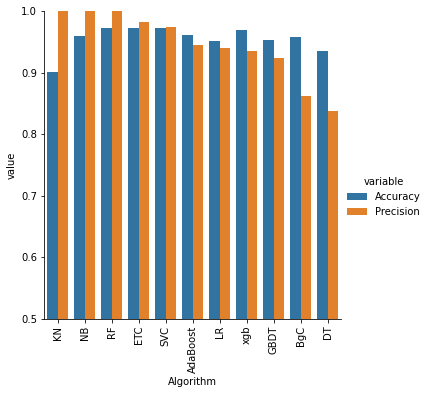

In [233]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 6. Hyperparameters

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model to achieve optimal performance. Hyperparameters are parameters that are set before the learning process begins and control the learning process itself, such as learning rate, number of hidden layers in a neural network, regularization strength, and so on. The goal of hyperparameter tuning is to find the hyperparameters that result in the best generalization performance on unseen data.

Outline of the hyperparameter tuning process:
  1. Split Data
  2. Choose the Model
  3. Choose the Search Method(Grid,Randomised)
  4. Perform Hyperparameter Search
  5. Evaluate Performance
  6. Select Best Hyperparameters
  7. Retrain with Best Hyperparameters
  8. Evaluate Final Model

We will try to improve the accuracy using hyperparameters tuning

# KNN

In [255]:
knnc_0 = KNeighborsClassifier()

print('Parameters currently in use:\n')
knnc_0.get_params()

Parameters currently in use:



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

We'll tune the following hyperparameter----
'n_neighbors': 5

#  2 Techniques used here :
 1.GridSearchCV
 2.RandomizedSearchCV

1. GridSearchCV technique

This technique attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on the specific parameter values of a model. The model is also known as an estimator.

In [257]:
from sklearn.model_selection import ShuffleSplit

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 3)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',#f1', 'precision', 'recall'
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=3, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [258]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.9299145299145298


2.Randomized Search cross validation

In [268]:
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]
param_grid = {'n_neighbors': n_neighbors}

knncr = KNeighborsClassifier()

random_search = RandomizedSearchCV(estimator=knncr,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',#f1', 'precision', 'recall'
                                   cv=3, 
                                   verbose=1, 
                                   random_state=3)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'n_neighbors': [1, 6, 11, 16, 21, 26,
                                                        31, 36, 41, 46, 51, 56,
                                                        61, 66, 71, 76, 81, 86,
                                                        91, 96, 101, 106, 111,
                                                        116, 121, 127, 132, 137,
                                                        142, 147, ...]},
                   random_state=3, scoring='accuracy', verbose=1)

In [269]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_neighbors': 61}

The mean accuracy of a model with these hyperparameters is:
0.9165646631885499


Mean accuracy of grid search(0.9299145299145298) > randomized search(0.9165646631885499) we will go with grid_search techniques.

In [270]:
best_knnc_model = grid_search.best_estimator_
best_knnc_model

KNeighborsClassifier(n_neighbors=1)

# Fitting the model and predicting

In [271]:
# Fitting the model
best_knnc_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [273]:
# Predicting the values
knn_y_pred = best_knnc_model.predict(X_test)

In [274]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, best_knnc_model.predict(X_train)))

The training accuracy is: 
1.0


In [276]:
# Testing accuracy
print("The testing accuracy is: ")
print(accuracy_score(y_test, knn_y_pred))

The testing accuracy is: 
0.925531914893617


Accuracy of KN model is increased from  0.9003868471953579 to 0.925531914893617 

# NB Multinomial

In [282]:
mnb = MultinomialNB()
print("Current parameters in use : ")
mnb.get_params()

Current parameters in use : 


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

We will tune parameter -- alpha

1. Grid Search

In [284]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search_nb = GridSearchCV(mnb, param_grid, cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]})

In [285]:
print("The best hyperparameters from Grid Search are:")
print(grid_search_nb.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search_nb.best_score_)

The best hyperparameters from Grid Search are:
{'alpha': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.9782345828295043


2.Randomized Search cross validation

In [291]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}
# Definition of the random search
random_search = RandomizedSearchCV(estimator=mnb,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=3)

# Fit the random search model
random_search.fit(X_train, y_train)

C:\Users\91953\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1]},
                   random_state=3, scoring='accuracy', verbose=1)

In [292]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'alpha': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.9765423574924581


Mean accuracy of grid search is greater than randomised search.

In [293]:
best_nbm_model = grid_search_nb.best_estimator_
best_nbm_model

MultinomialNB(alpha=0.1)

# Fitting and prediction the model

In [294]:
# Fitting the model
best_nbm_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [295]:
# Predicting the values
nbm_y_pred = best_nbm_model.predict(X_test)

In [296]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, best_nbm_model.predict(X_train)))

The training accuracy is: 
0.9954050785973397


In [299]:
# Testing accuracy
print("The testing accuracy is: ")
print(accuracy_score(y_test, nbm_y_pred))


The testing accuracy is: 
0.9738878143133463


# Change tfidf max_features to 3000 and then run the model again 

In [309]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [310]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [311]:
# create object of each classifier model
# kernel -- linear, polynomial, Radial basis , sigmoid 
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [312]:
# create dictionary with key and value as model
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [313]:
# function to return accuracy and precision for each model classifier
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [314]:
# test
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [315]:
# create accuracy and precision_scores array and store these values for each classifier objects
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [316]:
# create temporary dataframe to store the value
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}
                      ).sort_values('Precision_max_ft_3000',ascending=False)


In [317]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [318]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.970019,0.934959,0.967118,0.933333
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


If we see here ,  accuracy of NB model is increased from 0.9593 to 0.970986 and precison is 1.00 so we can go with naive bayes model.

2 . voting classifier --
  A Voting Classifier is an ensemble machine learning method in which multiple individual classifiers (also called "base classifiers") are combined to make predictions. The Voting Classifier takes the majority vote or the average prediction from the individual classifiers to make the final prediction. This approach is especially useful when you have multiple diverse classifiers, and by combining their predictions, you can achieve better overall performance

In [321]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [322]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [323]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [325]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [326]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [327]:
from sklearn.ensemble import StackingClassifier

In [328]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [329]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


# 7.  Pipeline

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# New Message prediction

In [337]:
input_sms= "Congratulations! You’ve won a free iPhone 12. To claim your prize, please follow the link below: [link]"

In [338]:
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])
mnb.fit(X_train,y_train)
result = mnb.predict(vector_input)[0]
print(result)
if result == 1 :
    print("Spam Message")
else :
     print("Ham Message")
    

1
Spam Message
